1. Show the distribution of the variable "perimeter_mean" and explain your observations
2. Generate statistics to explain the distribution of the above variable
3. Are there any outliers within the aforementioned variable?
4. Check the effective size of the perimeter_mean and discuss it.
5. What is the marginal probability of the perimeter_mean?
6. What is the probability of a tumour having a perimeter_mean less than or equal to 20?
7. What is the relationship between any two continuous variables in the cancer dataset?
8. Save the cancer dataset as an excel with your last name (e.g. Kayla.xlsx)

## 1. Show the distribution of the variable "perimeter_mean" and explain your observations

In [67]:
#import pandas to manage data as dataframes
import pandas as pd 

df = pd.read_csv("Cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Text(0, 0.5, 'Frequency')

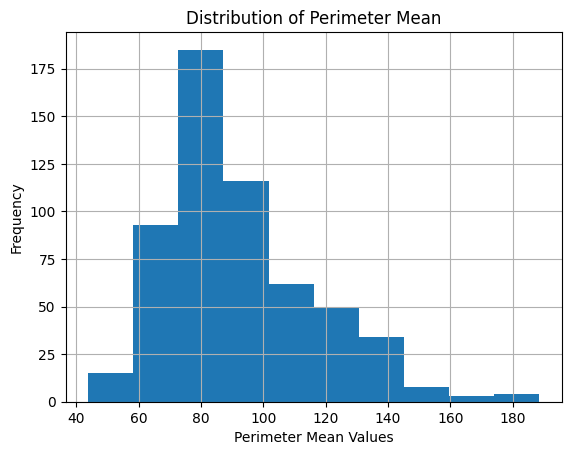

In [48]:
#perimeter mean variable 
pm = df['perimeter_mean']

#visual library
import matplotlib.pyplot as plt

#histogram for continuous variable 
pm.hist()

#Titles for histogram and axes
plt.title("Distribution of Perimeter Mean")
plt.xlabel("Perimeter Mean Values")
plt.ylabel("Frequency")


In [38]:
print("Peremeter Mean's mean =", pm.mean())
print("Peremeter Mean's median =", pm.median())

Peremeter Mean's mean = 91.96903339191564
Peremeter Mean's median = 86.24


#### Observations:

*The mean is greater than the median which means that the histogram is not normally distribution, and is instead positvely skewed.*

## 2. Generate statistics to explain the distribution of the above variable

In [39]:
#Shapiro-Wilks Test

from scipy.stats import shapiro 

#normality test 
stat, p = shapiro(pm)
print('Statistics=%.3f, p=%.3f' % (stat,p))

# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.936, p=0.000
Sample does not look Gaussian (reject H0)


### 3. Are there any outliers within the aforementioned variable?


Text(0, 0.5, 'Frequency')

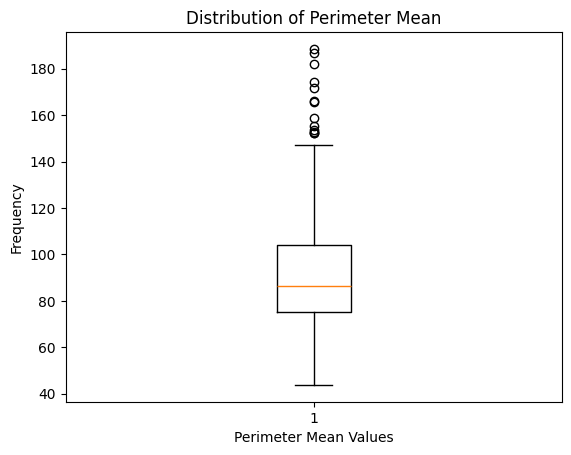

In [45]:
#using a boxplot to detect outliers
plt.boxplot(pm)

plt.title("Distribution of Perimeter Mean")
plt.xlabel("Perimeter Mean Values")
plt.ylabel("Frequency")


In [47]:
#get the descriptive stats
ds = pm.describe()

#First Quartile 
Q1 = ds[4]

#Third Quartile
Q3 = ds[6]

#IQR(inter quartile range) = Q3-Q1
IQR = Q3-Q1

#lower and upper boud
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

outliers = pm[((pm<lb) | (pm>ub))]

print("Anything outside this range is an outlier: (", lb ,",", ub,")")
print(outliers)



Anything outside this range is an outlier: ( 31.775000000000013 , 147.49499999999998 )
82     171.5
108    152.8
122    166.2
164    152.1
180    182.1
202    158.9
212    188.5
236    153.5
339    155.1
352    174.2
461    186.9
503    152.1
521    165.5
Name: perimeter_mean, dtype: float64


/var/folders/58/w62sy2_x61q4j1k07kbv21980000gn/T/ipykernel_16394/2249419897.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = ds[4]
/var/folders/58/w62sy2_x61q4j1k07kbv21980000gn/T/ipykernel_16394/2249419897.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = ds[6]


### 4. Check the effective size of the perimeter_mean and discuss it.

In [64]:
#radius mean
rm = df['radius_mean']
mean_diff = pm.mean() - rm.mean()

var_pm = pm.var()
var_rm = rm.var()
var_pooled = (len(pm)*var_pm +len(rm)*var_rm ) / float(len(pm)+ len(rm))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  4.483524258194357


The effect beteween the perimeter mean and radius mean is = 4.454. This is a large effective size. 

### 5. What is the marginal probability of the perimeter_mean?

In [65]:
## First turn the radius_mean in to discrete ranges
bins_perimeter = [0, 25, 50, 75, 100, 125, 150, 175]
labels_perimeter = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150','150-175']

## create a new column with the binned data
pm = pd.cut(df['perimeter_mean'], bins = bins_perimeter, labels=labels_perimeter, right=False)

## Calculate the Marginal Probabilities
perimeter_probabilities = df['perimeter_mean'].value_counts(normalize=True).sort_index()
perimeter_probabilities

perimeter_mean
43.79     0.001757
47.92     0.001757
47.98     0.001757
48.34     0.001757
51.71     0.001757
            ...   
171.50    0.001757
174.20    0.001757
182.10    0.001757
186.90    0.001757
188.50    0.001757
Name: proportion, Length: 522, dtype: float64

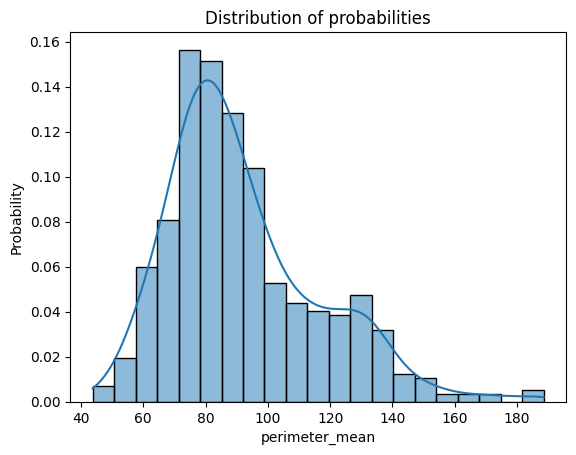

In [66]:
import seaborn as sns

sns.histplot(data=df,x='perimeter_mean',kde=True,stat='probability')
plt.title('Distribution of Probabilities')
plt.show()

### 6. What is the probability of a tumour having a perimeter_mean less than or equal to 20?

In [76]:
#perimeter mean values equal to or less than 20
pm20 = df[df['perimeter_mean'] <= 20]
P = len(pm20)/len(pm) 

print(f'Probability of a tumour having a perimeter_mean less than or equal to 20 = {P}')

Probability of a tumour having a perimeter_mean less than or equal to 20 = 0.0


### 7. What is the relationship between any two continuous variables in the cancer dataset?

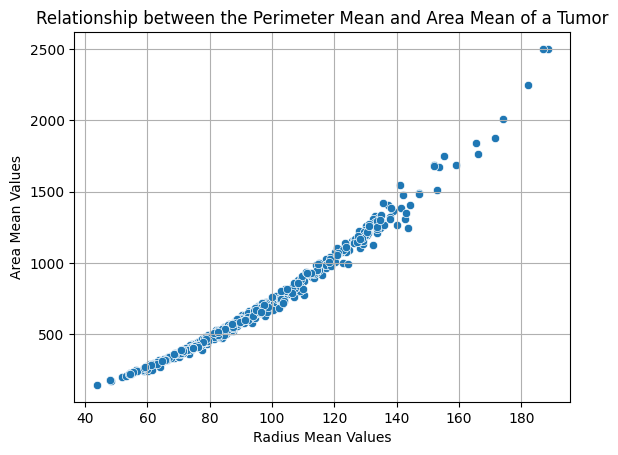

In [77]:
sns.scatterplot(x='perimeter_mean', y='area_mean', data=df)
plt.title('Relationship between the Perimeter Mean and Area Mean of a Tumor')
plt.xlabel('Radius Mean Values')
plt.ylabel('Area Mean Values')
plt.grid(True)
plt.show()